# Notebook 2
Propósito: Explorar el dataset crudo para entender su estructura y calidad.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()
connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
engine = create_engine(connection_string)

In [7]:
query = "SELECT * FROM raw_candidates;"
df_raw = pd.read_sql(query, engine)
df_raw

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


In [9]:
print("Resumen estadístico:\n", df_raw.describe())
print("Valores nulos:\n", df_raw.isnull().sum())
print("Distribución de Seniority:\n", df_raw['Seniority'].value_counts())

Resumen estadístico:
                 YOE  Code Challenge Score  Technical Interview Score
count  50000.000000          50000.000000               50000.000000
mean      15.286980              4.996400                   5.003880
std        8.830652              3.166896                   3.165082
min        0.000000              0.000000                   0.000000
25%        8.000000              2.000000                   2.000000
50%       15.000000              5.000000                   5.000000
75%       23.000000              8.000000                   8.000000
max       30.000000             10.000000                  10.000000
Valores nulos:
 First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64
Distribución de Se

In [14]:
#df_raw.duplicated().sum()
df_raw.nunique()

First Name                    3007
Last Name                      474
Email                        49833
Application Date              1646
Country                        244
YOE                             31
Seniority                        7
Technology                      24
Code Challenge Score            11
Technical Interview Score       11
dtype: int64

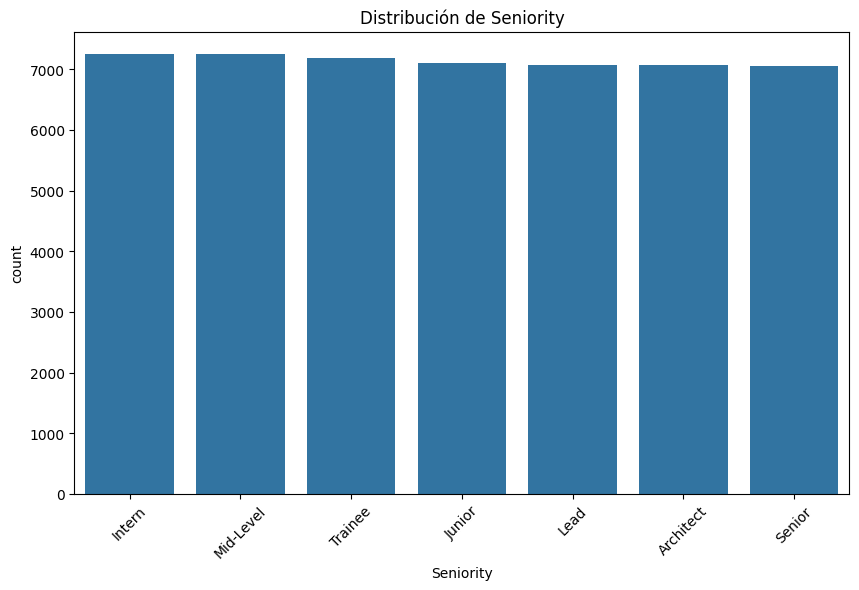

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_raw, x='Seniority')
plt.title('Distribución de Seniority')
plt.xticks(rotation=45)
plt.show()